Problem1

PartA


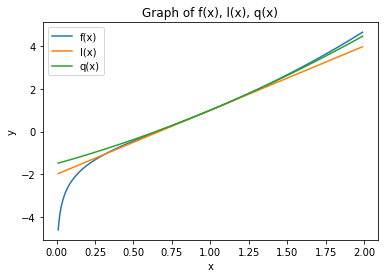

In [ ]:
from matplotlib import pyplot as plt
import math
import numpy as np

def f(x):
  return math.log(x) + x**2

def l(x):
  #l(x) = f(1) + f'(1)(x-1) [using taylor's approximation theorem]
  #f(1) = 1
  #f'(1) = 3
  # l(x) = 1 + 3(x-1) = 3x - 2
  return 3*x - 2

def q(x):
  #q(x) = f(1) + f'(1)(x-1) + 1/2(f''(1))*(x-1)**2 [using taylor's approximation theorem]
  #f(1) = 1
  #f'(1) = 3
  #f''(1) = 1
  # q(x) = 1 + 3(x-1)+ (1/2)*(x-1)**2= 3x - 2  +(1/2)*(x-1)**2
  return 3*x - 2  +(1/2)*((x-1)**2)

inp = np.arange(0.01,2, 0.01)
# print(inp)
fout = []
lout = []
qout = []
# Calculating corresponding values of f(x), l(X), q(x) 
for i in range(len(inp)):
  fout.append(f(inp[i]))
  lout.append(l(inp[i]))
  qout.append(q(inp[i]))

# Plotting the corresponding graph
plt.plot(inp,fout)
plt.plot(inp,lout)
plt.plot(inp, qout)
plt.title("Graph of f(x), l(x), q(x)")
plt.legend(["f(x)", "l(x)", "q(x)"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()







PartB


<ipython-input-2-c491a141de2e>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x)-l(x))/(x-1)
<ipython-input-2-c491a141de2e>:6: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x)-q(x))/((x-1)**2)


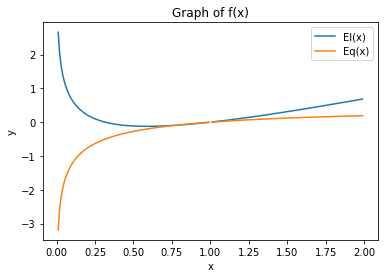

In [ ]:
# Created functions as defined in the question
def El(x):
  return (f(x)-l(x))/(x-1)

def Eq(x):
  return (f(x)-q(x))/((x-1)**2)

elout = []
eqout = []
# Calculating linear and quadritic estimation error 
for i in range(len(inp)):
  elout.append(El(inp[i]))
  eqout.append(Eq(inp[i]))

# Plotting the corresponding graph
plt.plot(inp,elout)
plt.plot(inp,eqout)
plt.title("Graph of f(x)")
plt.legend(["El(x)", "Eq(x)"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Problem2


In [3]:
# installing numdifftools
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 3.9 MB/s eta 0:00:00


In [8]:
import numdifftools as nd
import math
import numpy as np
# Created f(x) as given in the question Pdf
def f(x):
  return (x[0]**2 -3*(x[1]**2))**2 + (np.sin(x[0]**2 + x[1]**2))**2

# Calculated mod of the gradient vector of f(x) and used Gradient in numdifftools
# to calculate the gradient vector
def modfgrad(x):
  y = nd.Gradient(f)(x)
  return (y[0]**2 + y[1]**2)**(0.5)

# beta will be between (0,1)
# alpha will be beteen (0, 0.5)

def lineSearchAlgo(alpha, beta, x, d):
  t = 1
  while(f(x) - f(np.add(x, t*d))) < (-1)*alpha*((np.dot(nd.Gradient(f)(x), t*d))): 
    t = t*beta
  return t  

# calculated Df(x)(td) by finding the dot product of gradF and vector d scaled by t
def gradientDescent(x, eta):
  while(modfgrad(x) > eta):
    d = (-1)*nd.Gradient(f)(x)
    # print(d)
    t = lineSearchAlgo(0.3, 0.8, x, d)

    print("t : ",t, " x : ",x, " d : ", d)

    x = x + t*d 
    # x[0] = x[0] + t*d[0]
    # x[1] = x[1] + t*d[1]

    # print(x, d, t)
#   return x  

# Calculated the hessian matrix of f(x) using Hessian function in numdifftools
# Calculated the inverse of the matrix using np.linalg.inv()
# Performed matrix multiplication by using np.matmul
def newtonDescent(x, eta):
  while(modfgrad(x) > eta):
      d = -np.matmul(np.linalg.inv(nd.Hessian(f)(x)), nd.Gradient(f)(x)) 
      t = lineSearchAlgo(0.3, 0.8, x, d)
      print("t : ",t, " x : ",x, " d : ", d)
      x = x + t*d 
  return x

# Calculated eigenValues of the hessian matrix using np.linalg.eigvals() to check whether
# it is positive definite or not. If all the eigen values are greater than 0 then the matrix
# is positive definite

def combinationDescent(x, eta):
  while(modfgrad(x) > eta):
    hMatrix = nd.Hessian(f)(x)
    EigenValues = np.linalg.eigvals(hMatrix)
    flag = 0
    d = []
    for i in EigenValues:
        if( i <= 0):
          flag = 1
          break
    # Used newtonDescent algorithim if the hessian matrix of f(x) is positive definite
    # and used gradientDescent algorithim if not.           
    if(flag == 0):
      d = -np.matmul(np.linalg.inv(nd.Hessian(f)(x)), nd.Gradient(f)(x)) 
    else:
      d = (-1)*nd.Gradient(f)(x)
    t = lineSearchAlgo(0.1, 0.3, x, d)
    # print("t : ",t, " x : ",x, " d : ", d)
    x = x + t*d
  return x 




x = np.array([1,1])


y = combinationDescent(x, 1e-5)
# z = gradientDescent(x, 1e-5)
# print(z)
# print("Final value :", f(z))
print(y)
print("Final value :", f(y))


[0.0106475  0.00466658]
Final value : 2.057215818072526e-08


Question3

In [9]:
#Created g1, g2 and g3 as given in the question 
def g1(x):
  return 2*x[1] - x[0]

def g2(x):
  return 2*x[0] - x[1]

def g3(x):
  return 1 -x[1] - x[0]

def psi(x):
  # log(a) + log(b) + log(c) = log(a*b*c)
  # -log(a)= log(1/a)
  # now Ψ(x) = -(log(g1(x)) + log(g2(x)) + log(g3(x)))
  #  Ψ(x) = -log(g1(x)*g2(x)*g3(x))
  #  Ψ(x) = log(1/(g1(x)*g2(x)*g3(x))) 
  # now since log is an increasing function minimizing 1/(g1(x)*g2(x)*g3(x)) will
  # minimze Ψ(x)
  return 1/(g1(x)*g2(x)*g3(x))

#I am not writing comments to explain the next functions because they are similar to
#functions used in question2 
def modPsiGrad(x):
  y = nd.Gradient(psi)(x)
  return (y[0]**2 + y[1]**2)**(0.5)

def lineSearch2(alpha, beta, x, d):
  t = 1
  while(psi(x) - psi(np.add(x, t*d))) < (-1)*alpha*((np.dot(nd.Gradient(psi)(x), t*d))): 
    t = t*beta
  return t  

def combinationDescent2(x, eta):
  while(modPsiGrad(x) > eta):
    hMatrix = nd.Hessian(psi)(x)
    EigenValues = np.linalg.eigvals(hMatrix)
    flag = 0
    d = []
    for i in EigenValues:
        if( i <= 0):
          flag = 1
          break
    if(flag == 0):
      d = -np.matmul(np.linalg.inv(nd.Hessian(psi)(x)), nd.Gradient(psi)(x)) 
    else:
      d = (-1)*nd.Gradient(psi)(x)
    t = lineSearch2(0.1, 0.3, x, d)
    # print("t : ",t, " x : ",x, " d : ", d)
    x = x + t*d
  return x 

x = np.array([0.25, 0.25])
y = combinationDescent2(x, 1e-5)
# z = gradientDescent2(x, 1e-5)
# print(z)
# print("Final value :", np.log(psi(z)))
print(y)
# print(g1(y))
# print(g2(y))
# print(g3(y))
print("Final value :", np.log(psi(y)))


[0.33333333 0.33333333]
Final value : 3.295836866004329
